## Regression using Mini-batch Gradient Descent

In [1]:
from robingrad import Tensor, draw_dot
import robingrad.nn as nn
from robingrad.optim import SGD, Adam
from robingrad.state import get_parameters
from sklearn.datasets import make_regression
import numpy as np
import time
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset

In [2]:
X, y = make_regression(n_samples=200, n_features=5, n_targets=1, random_state=42)
print(X.shape)
print(y.shape)
print(X[0])
print(y[0:5])

(200, 5)
(200,)
[0.95927083 0.02451017 0.49799829 1.45114361 2.15318246]
[172.54436082 -52.9529574   -4.14935233 193.99958991 -66.96262773]


In [3]:
# Convert into Tensor object
X_train = Tensor(X, requires_grad=True)
print(type(X_train), X_train.shape)
y_train = Tensor(y, requires_grad=True).reshape((200,1))
print(type(y_train), y_train.shape)

<class 'robingrad.tensor.Tensor'> (200, 5)
<class 'robingrad.tensor.Tensor'> (200, 1)


In [4]:
class RobinNet:
    def __init__(self):
        self.l1 = nn.Linear(5,16)
        self.l2 = nn.Linear(16,1)
    def __call__(self, x):
        x = self.l1(x)
        x = x.relu()
        x = self.l2(x)
        return x
        
model = RobinNet()

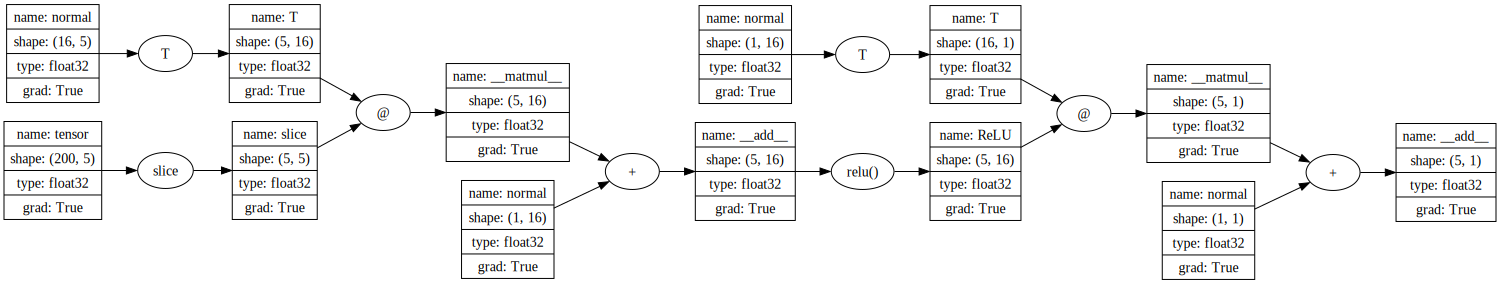

In [5]:
# Forward pass example 
res = model(X_train[0:5])
draw_dot(res)

### Train 

In [6]:
params = get_parameters(model)
opt = SGD(params)

In [7]:
batch_size = 32
epochs = 100
num_batches = int(np.ceil(X_train.shape[0] / batch_size))
print(num_batches)

for epoch in range(epochs):
    y_pred = []
    losses = []
    s = time.monotonic()
    for batch_idx in range(num_batches):
        start_idx = batch_idx * batch_size
        end_idx = (batch_idx + 1) * batch_size
        batch_X = X_train[start_idx:end_idx]
        batch_y = y_train[start_idx:end_idx]
        output = model(batch_X)
        y_pred.extend(output.data.squeeze())
        target = batch_y
        loss = ((output-target)**2).mean()
        losses.append(float(loss.data))
        opt.zero_grad()
        loss.backward()
        opt.step()
    e = time.monotonic()
    t = e - s
    loss_epoch = sum(losses)/ len(losses)
    r2 = r2_score(y, y_pred)
    if epoch % 10 == 0 or epoch == epochs-1:
        print(f"epoch: {epoch} | loss: {loss_epoch:.2f} | R2: {r2:.2f} | time: {t:.2f} sec.")

7
epoch: 0 | loss: 9481.39 | R2: 0.05 | time: 0.01 sec.
epoch: 10 | loss: 217.04 | R2: 0.98 | time: 0.00 sec.
epoch: 20 | loss: 142.29 | R2: 0.98 | time: 0.00 sec.
epoch: 30 | loss: 129.18 | R2: 0.99 | time: 0.00 sec.
epoch: 40 | loss: 118.39 | R2: 0.99 | time: 0.00 sec.
epoch: 50 | loss: 108.41 | R2: 0.99 | time: 0.00 sec.
epoch: 60 | loss: 97.00 | R2: 0.99 | time: 0.00 sec.
epoch: 70 | loss: 86.10 | R2: 0.99 | time: 0.00 sec.
epoch: 80 | loss: 76.02 | R2: 0.99 | time: 0.00 sec.
epoch: 90 | loss: 66.27 | R2: 0.99 | time: 0.00 sec.
epoch: 99 | loss: 58.10 | R2: 0.99 | time: 0.00 sec.


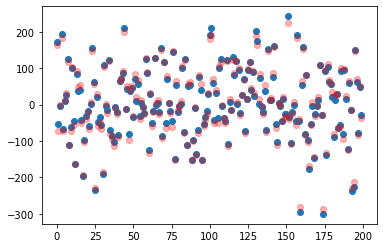

In [8]:
x = [i for i in range(len(X))]
plt.scatter(x, y)
plt.scatter(x, y_pred, color='red', alpha=0.3)
plt.show()